# Nonlinear Regression



Often a dependent variable (Y ) will be continuous:
- i.e. district-wide average test score, traffic fatality rate, salary

What if Y is binary?
- Y = pass entrance exam, or not; 
- X = high school grades, SAT scores, demographic variables

When Y is binary, the linear regression model is called the linear probability model because 

$Pr(Y=1|X_i )=β_0+ β_1 X_i$

The predicted value is a probability:
- The probability that Y=1 for a given x is written 𝐸(𝑌|𝑥) = Pr⁡( 𝑌=1|𝑋=𝑥)
- $\hat{𝑌}$ ̂is the predicted probability that ($𝑌_{𝑖}=1|𝑥$) 

$β_1$ is the difference in the probability of a successful outcome related to a one-unit change in the independent variable x:

$𝛽_1=\frac{(Pr⁡( 𝑌=1|𝑋=𝑥+Δ𝑥) − Pr⁡( 𝑌=1|𝑋=𝑥))}{Δ𝑥}$

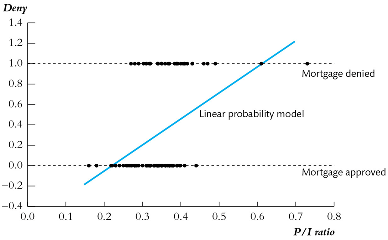

Advantages:
- Simple to estimate and to interpret
- Inference is the same as for multiple regression 

Disadvantages:
- A LPM says that the change in the predicted probability for a given change in X is the same for all values of X, but that doesn’t make sense. 
- Also, LPM predicted probabilities can be <0 or >1!
- These disadvantages can be solved by using a nonlinear probability model: probit and logit regression


In [1]:
import pandas as pd                    # for data handling
import numpy as np                     # for numerical methods and data structures
import matplotlib.pyplot as plt        # for plotting
import seaborn as sea                  # advanced plotting
import statsmodels.tools as sm
import statsmodels.formula.api as smf  # provides a way to directly spec models from formulas

In [4]:
# Use pandas read_stata method to get the stata formatted data file into a DataFrame.
mortgage = pd.read_csv('../data/Mortgage.csv')

# Take a look...so clean!
mortgage.describe()

,deny,pi_rat,black
count,2380.000000,2380.000000,2380.000000
mean,0.119748,0.330814,0.142437
std,0.324735,0.107257,0.349571
min,0.000000,0.000000,0.000000
25%,0.000000,0.280000,0.000000
50%,0.000000,0.330000,0.000000
75%,0.000000,0.370000,0.000000
max,1.000000,3.000000,1.000000


The file 'mortgage.csv' contains cross-sectional data about mortgage applications made in 1990 in the greater Boston metropolitan area. We will use `deny` which is equal to 1 if the mortgage application was denied and zero otherwise and `pi_ration` which holds the price-to-income ratio for the applicant.

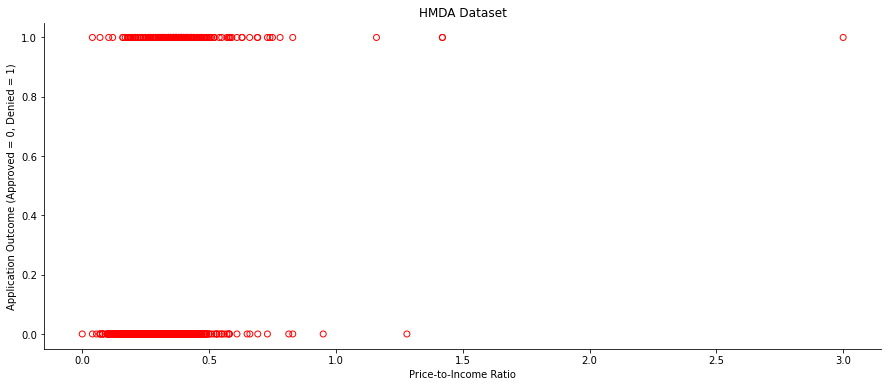

In [5]:
fig, ax = plt.subplots(figsize=(15,6))

ax.scatter( mortgage['pi_rat'], mortgage['deny'], facecolors='none', edgecolors='red')

ax.set_ylabel('Application Outcome (Approved = 0, Denied = 1)')
ax.set_xlabel('Price-to-Income Ratio')
ax.set_title('HMDA Dataset')

sea.despine(ax=ax)

### OLS

The linear probability model is:

$$\text{Pr}(Denied=1 \mid PI\_Ratio) = \beta_0 + \beta_1 PI\_Ratio + \epsilon .$$

Linear probability models often generate predicted probabilities outside of the interval between zero and one.


In [8]:
# statsmodels adds a constant for us...
res_ols = smf.ols('deny ~ pi_rat', data=mortgage).fit()

res_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   deny   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     98.41
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           9.37e-23
Time:                        16:41:25   Log-Likelihood:                -651.42
No. Observations:                2380   AIC:                             1307.
Df Residuals:                    2378   BIC:                             1318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0799      0.021     -3.777      0.000      -0.121      -0.038
pi_rat         0.6035      0.061      9.920      0.000       0.484       0.723
==============================================================================
Omnibus:                     1018.085   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3273.764
Skew:                           2.280   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


Use the `predictedvalues` attribute of the results object to recover the fitted values of the dependent variable and plot them to see where they end up.


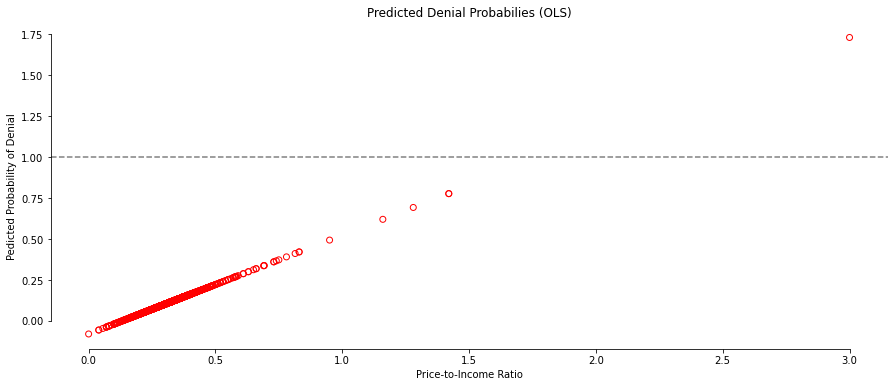

In [7]:
fig, ax = plt.subplots(figsize=(15,6))

ax.scatter(mortgage['pi_rat'], res_ols.fittedvalues,  facecolors='none', edgecolors='red')
ax.axhline(y=1.0, color='grey', linestyle='--')

ax.set_ylabel('Pedicted Probability of Denial')
ax.set_xlabel('Price-to-Income Ratio')
ax.set_title('Predicted Denial Probabilies (OLS)')

sea.despine(ax=ax, trim=True)

The problem with the linear probability model is that it models the probability of $Y = 1$ as being linear in $X: Pr⁡( 𝑌 = 1|𝑋) = β_0 + β_1𝑋$

Instead, we want:
 1. $Pr⁡( 𝑌 = 1|𝑋)$ to be increasing in X for $β_1 > 0$, and
 2. $0≤Pr⁡( 𝑌 = 1|𝑋)≤1$ for all X

This requires using a nonlinear functional form for the probability. 

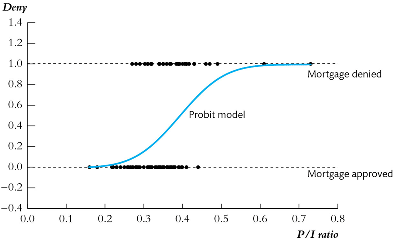

One very common option is the probit model. Another, even more common option, is the logit model:

## Logistic regression (logit)
The logistic regression constrains the output to lie between zero and one. It achieves this by passing the linear function through a non-linear function:

$$\text{prob} = \frac{\exp \left({\beta_0+\beta_1 PI\_Ratio}\right)}{1+\exp \left({\beta_0+\beta_1 PI\_Ratio}\right)},$$

We estimate the logit model identical to how we estimate linear models.

In [10]:
res_log = smf.logit('deny ~ pi_rat', data=mortgage).fit()
print(res_log.summary())

Optimization terminated successfully.
         Current function value: 0.348779
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   deny   No. Observations:                 2380
Model:                          Logit   Df Residuals:                     2378
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Nov 2023   Pseudo R-squ.:                 0.04815
Time:                        16:42:14   Log-Likelihood:                -830.09
converged:                       True   LL-Null:                       -872.09
Covariance Type:            nonrobust   LLR p-value:                 4.992e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0284      0.269    -14.999      0.000      -4.555      -3.502
pi_rat         5.8845      0.

Interpreting logit coefficients is bit more complicated. 

You may notice `res_log.fittedvalues` holds the fitted value of $\beta_0+\beta_1 spread$ and not the estimated probability. It is possible to compute the probability using the `exp` method of numpy. 

In [13]:
pred_probs = np.exp(res_log.fittedvalues) /( 1+np.exp(res_log.fittedvalues) )
mortgage['predict'] = pred_probs

In [14]:
mortgage['predict'].describe()

count    2380.000000
mean        0.119748
std         0.070859
min         0.017491
25%         0.084651
50%         0.110411
75%         0.135736
max         0.999999
Name: predict, dtype: float64

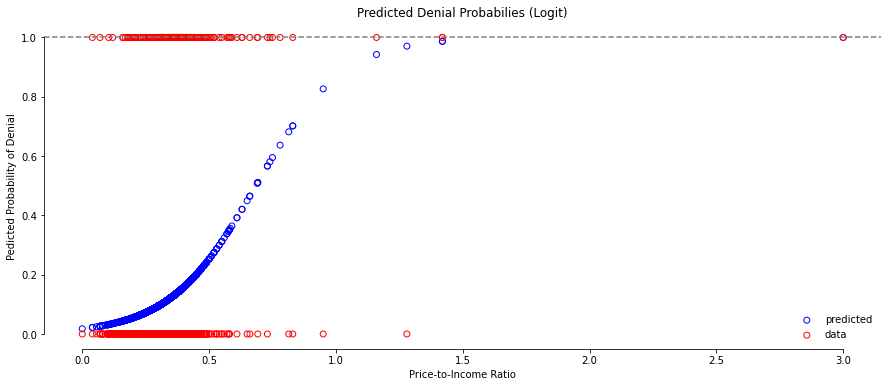

In [15]:
fig, ax = plt.subplots(figsize=(15,6))

ax.scatter(mortgage['pi_rat'], pred_probs,  facecolors='none', edgecolors='blue', label='predicted')
ax.scatter(mortgage['pi_rat'], mortgage['deny'],  facecolors='none', edgecolors='red', label = 'data')
ax.axhline(y=1.0, color='grey', linestyle='--')

ax.set_ylabel('Pedicted Probability of Denial')
ax.set_xlabel('Price-to-Income Ratio')
ax.set_title('Predicted Denial Probabilies (Logit)')

ax.legend(frameon=False)
sea.despine(ax=ax, trim=True)

## Probit regression (probit)
Probit regression passes the linear model through a non-linear function that constrains the output to lie between zero and one. (These functions are cumulative distribution functions.) In the probit case, the function is the cumulative normal distribution function.

The "S-shape" of the cumulative normal probability distribution gives us to alluring properties:
1. $Pr(Y=1|X)$ is increasing in X for $β_1 > 0$
2. $0 \leq Pr(Y=1|X) \leq 1$ for all X

The profit regression model is very easy to use. The probabilities are tabulated in the cumulative normal tables and has a relatively straightforward interpretation:

- $β_0 + β_1 X =$ z-value

- $β_1$ is the change in the z-value for a unit change in X


We estimate the probit model with `probit( )` method from `smf` in a way similar to ols. 

In [16]:
import pandas as pd
import numpy as np
from statsmodels.discrete.discrete_model import Probit
import statsmodels.api as sm

In [17]:
Y = mortgage["deny"]
X = mortgage["pi_rat"]
X = sm.add_constant(X)
model = Probit(Y, X.astype(float))
probit_model = model.fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.349493
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                   deny   No. Observations:                 2380
Model:                         Probit   Df Residuals:                     2378
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Nov 2023   Pseudo R-squ.:                 0.04620
Time:                        16:44:19   Log-Likelihood:                -831.79
converged:                       True   LL-Null:                       -872.09
Covariance Type:            nonrobust   LLR p-value:                 2.783e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1942      0.129    -17.010      0.000      -2.447      -1.941
pi_rat         2.9679      0.

You can try this using the syntax we used for the logistic regression

In [18]:
res_probit = smf.probit('deny ~ pi_rat', data=mortgage).fit()
print(res_probit.summary())

Optimization terminated successfully.
         Current function value: 0.349493
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:                   deny   No. Observations:                 2380
Model:                         Probit   Df Residuals:                     2378
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Nov 2023   Pseudo R-squ.:                 0.04620
Time:                        16:44:55   Log-Likelihood:                -831.79
converged:                       True   LL-Null:                       -872.09
Covariance Type:            nonrobust   LLR p-value:                 2.783e-19
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1942      0.129    -17.010      0.000      -2.447      -1.941
pi_rat         2.9679      0.

A marginal effect can be calculated by calling the get_margeff() method of the probit model class. 

In [19]:
mfx = probit_model.get_margeff(at='mean')
print(mfx.summary())


       Probit Marginal Effects       
Dep. Variable:                   deny
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pi_rat         0.5678      0.069      8.234      0.000       0.433       0.703


Probability for each observation can be calculated as follows:

In [20]:
res_probit.params
# predicted probability of each obs
z = res_probit.predict(mortgage)

In [21]:
z.describe()

count    2380.000000
mean        0.119488
std         0.065577
min         0.014112
25%         0.086418
50%         0.112231
75%         0.136532
max         1.000000
dtype: float64

## Practice

Take 10 minutes to complete the following. Collaborate with those around you if you get stuck.

1. Load the data 'Mortgage_Full.csv'. Reference the data dictionary below to understand the variables:

- deny = deny
- pi_rat = P/I ratio
- black = black
- hse_inc = housing expense to income ratio
- loan_val = loan to value ratio
- ccred = Consumer credit score
- mcred = mortgage credit score
- pubrec = public bad credit record
- denpmi = denied mortgage insurance
- selfemp = self-employed
- married = maried
- single = single
- hischl = high school diploma
- probunmp = unemployment rate
- condo = condo

2. Estimate a linear probability model relating the probability of mortgage application denial to applicant characteristics. 

$$\text{deny} = \beta_0 + \beta_1 \text{black} + \beta_2 \text{pi_rat} + \beta_3 \text{hse_inc} + \beta_4 \text{loan_val} + \beta_5 \text{ccred} + \beta_6 \text{married} +  \epsilon$$

Are any of the estimated probabilities outside of the realm of possibility?


In [32]:
mortgage = pd.read_csv('../data/Mortgage_full.csv')
mortgage.describe()

res_ols = smf.ols('deny ~ pi_rat + black + selfemp + married + hischl + denpmi', data=mortgage).fit()
res_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   deny   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     94.37
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          1.42e-106
Time:                        16:53:58   Log-Likelihood:                -445.02
No. Observations:                2380   AIC:                             904.0
Df Residuals:                    2373   BIC:                             944.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0598      0.053      1.122      0.262      -0.045       0.164
pi_rat         0.4965      0.056      8.812      0.000       0.386       0.607
black          0.1477      0.017      8.499      0.000       0.114       0.182
selfemp        0.0617      0.019      3.294      0.001       0.025       0.098
married       -0.0351      0.012     -2.843      0.005      -0.059      -0.011
hischl        -0.1288      0.048     -2.711      0.007      -0.222      -0.036
denpmi         0.7665      0.043     17.905      0.000       0.683       0.850
==============================================================================
Omnibus:                     1081.996   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4178.571
Skew:                           2.316   Prob(JB):                         0.00
Kurtosis:                       7.549   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. Now estimate a probit model using the same data. Probit models process a linear model through the cumulative density function of the normal distribution. 

$$\text{Pr}(\text{deny}=1 \mid X) = \Phi \left(\beta_0 + \beta_1 \text{black} + \beta_2 \text{pi_rat} + \beta_3 \text{hse_inc} + \beta_4 \text{loan_val} + \beta_5 \text{ccred} + \beta_6 \text{married} \right),$$

where $\Phi( )$ is the CDF of the normal distribution. 

The coefficient estimates are largely meaningless. Instead, calculate the marginal effects of the coefficients. These represent the marginal change in predicted probability as the independent variables change.

4. Finally, estimate the model as a logit model and compute the marginal effects of the logit coefficients. Are they consistent with what you calculated in (3)?